# ITMAL Exercise


REVISIONS||
---------||
2018-1219| CEF, initial.                  
2018-0207| CEF, updated.           
2018-0207| CEF, rewritten accuracy paradox section. 
2018-0305| CEF, updated with SHN comments.
2019-0901| CEF, updated for ITMAL v2.
2019-0904| CEF, updated for print-f and added conclusion Q.

## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  

You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

| NAME | SYMBOL | ALIAS |
| :---: | :---: | :---: |
|true positives | $TP$ | |
|true negatives | $TN$ | |
|false positives| $FP$ | type I error| 
|false negatives| $FN$ | type II error |

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\by{\mathbf{y}}
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand\st[1]{_{\scriptsize #1}}
\newcommand\myfrac[2]{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ba
 p &= \myfrac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \myfrac{TP}{TP + FN}\\
      &= \myfrac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
        &= \myfrac{TP + TN}{N}\\
        &= \myfrac{TP + TN}{N_P~~ + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weight could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \myfrac{2pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1 &= \myfrac{2pr}{p+r}\\
        &= \myfrac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

Also notice, that the layout of this matrix is different of what is given in [HOML], "Confusion Matrix", p.86/fig 3-2. This is just a minor issue, since we can always flip/rotate/transpose the matrix (say by flipping the $\by\st{true}$ and $\by\st{pred}$ arguments). 

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion}~~~ =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="https://itundervisning.ase.au.dk/E19_itmal/L02/Figs/performance_metrics.png" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

We now follow the convention in Scikit-learn, that a score funtion takes the arguments `y_true` and then `y_pred`

```
    sklearn.metrics.accuracy_score(y_true, y_pred, ..)
```

Implement a general accuracy function `MyAccuracy(y_true, y_pred)`.

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOLM]).

Compare your accuracy score with the acutal value from `sklearn.metrics.accuracy_score()`.

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator as be
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier


import numpy as np

def MNIST_GetDataSet():
    X, y = fetch_openml('mnist_784', return_X_y=True)
    X = X / 255
    X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
    shuffle_index = np.random.permutation(60000)
    X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
    return X_train, X_test, y_train, y_test

def MyAccuracy(y_true, y_pred):
        return np.sum(y_true == y_pred.T) / np.array(y_true).shape[0];
    
class Never5Classifier(be):
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X), 1), dtype=bool)

def TestAccuracy(y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"\nmy a          ={a0}")
    print(f"scikit-learn a={a1}")

    
X_train, X_test, y_train, y_test = MNIST_GetDataSet();    
y_train_5 = (y_train == '5')    
y_test_5  = (y_test == '5')

never_5_clf = Never5Classifier()
never_5_clf.fit(X_train, y_train_5)
prediction_never_5 = never_5_clf.predict(X_test)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
prediction_sgd = sgd_clf.predict(X_test)

TestAccuracy(y_test_5, prediction_sgd)
TestAccuracy(y_test_5, prediction_never_5)


my a          =0.9767
scikit-learn a=0.9767

my a          =0.9108
scikit-learn a=0.9108


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data.

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

In [15]:
# TODO: Qb..
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


def MyPrecision(y_true, y_pred):
    return np.sum(np.logical_and((y_true == True),(y_pred.T == True))) / np.sum(y_pred == True)

def MyRecall(y_true, y_pred):
    return np.sum(np.logical_and((y_true == True),(y_pred.T == True))) / np.sum(y_true == True)
    
def MyF1Score(y_true, y_pred):
    precision = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_true, y_pred)
    return 2/(1/precision+1/recall)

def TestPrecision(y_true, y_pred):
    a0=MyPrecision(y_true, y_pred)
    a1=precision_score(y_true, y_pred)
    print(f"\nmy precision a          ={a0}")
    print(f"scikit-learn a={a1}")

def TestRecall(y_true, y_pred):
    a0=MyRecall(y_true, y_pred)
    a1=recall_score(y_true, y_pred)
    print(f"\nmy recall a          ={a0}")
    print(f"scikit-learn a={a1}")    
    
def TestF1(y_true, y_pred):
    a0=MyF1Score(y_true, y_pred)
    a1=f1_score(y_true, y_pred)
    print(f"\nmy f1 a          ={a0}")
    print(f"scikit-learn a={a1}")

TestPrecision(y_test_5, prediction_never_5)
TestPrecision(y_test_5, prediction_sgd)
TestRecall(y_test_5, prediction_never_5)
TestRecall(y_test_5, prediction_sgd)
TestF1(y_test_5, prediction_never_5)
TestF1(y_test_5, prediction_sgd)

# TODO: your test code here!


my precision a          =nan
scikit-learn a=0.0

my precision a          =0.9052890528905289
scikit-learn a=0.9052890528905289

my recall a          =0.0
scikit-learn a=0.0

my recall a          =0.8251121076233184
scikit-learn a=0.8251121076233184

my f1 a          =nan
scikit-learn a=0.0

my f1 a          =0.8633431085043989
scikit-learn a=0.8633431085043989


C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% eq

#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Generate the confusion matrix for both the Dummy and the SGD classifier using the `scklearn.metrics.confusion_matrix` function. 

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_train_pred, y_train_5)
```

instead of 
```python
confusion_matrix(y_train_5, y_train_pred)
```

Answer: 

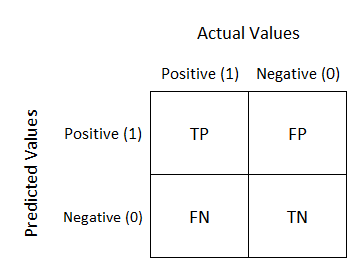

If you mess up the paramaters calling, you would give it a wrong input. In this example you would be giving the estimated targets, as returned by a classifier, where the confusion matrix wants the correct target values, and visa versa.

In [1]:
from sklearn.metrics import confusion_matrix

M_dummy = confusion_matrix(y_test_5, prediction_never_5)

M_SGD = confusion_matrix(y_test_5, prediction_sgd)

print("Forvirringsmatricerne er opbygget som dette eksempel:\n")
eksempel = np.matrix([["TN", "FP"],["FN", "TP"]])
print(eksempel)

print( "\nDummy confusion matrix.")
print(M_dummy)
print("\nSGD confusion matrix.")
print(M_SGD)

NameError: name 'y_test_5' is not defined

#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML] "Error Analysis", pp.96-97.

This heat map could be an important guide for you when analysing multiclass data in the future.

Dummy heat map.


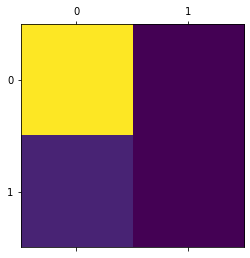


SGD heat map.


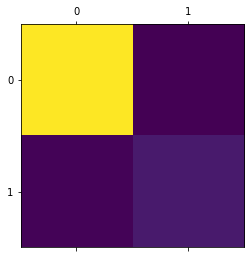

In [19]:
import matplotlib.pyplot as plt

print("Dummy heat map.")
plt.matshow(M_dummy)
plt.show()

print("\nSGD heat map.")
plt.matshow(M_SGD)
plt.show()

### Qe Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).



In this excersise we have learned the basics around the accuracy score and the precision score. We made our own functions to compare them to the ones in scikit, and we can conclude that they are as good and precise as the ones that are predefined. At last we worked with confusion matrices to generate heat map images. 

all the tests made were made on our previously made function such as the dumm_classifiers etc. 
